## EX7.4 and EX7.5 in Chapra book

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# lake parameter
V = np.array([0.5, 0.6])*1e6  # m^3
Q = np.array([1e6, 1e6])  # m^3/yr

Mass balance equation (Equations 5.13 and 5.14):

$dc_1/dt = -\lambda_{11}c_1$

$dc_2/dt = \lambda_{21}c_1 - \lambda_{22}c_2$

where $\lambda_{11} = Q_{12}/V_1$, $\lambda_{21} = Q_{12}/V_2$, $\lambda_{22} = Q_{23}/V_2$.

In [7]:
m = 5e3 # spilled mass into the first lake, g
c0 = np.array([m/V[0], 0]) # concentration in two lakes, g/m^3

lamb_11 = Q[0]/V[0]
lamb_21 = Q[0]/V[1]
lamb_22 = Q[1]/V[1]

In [18]:
def two_lakes_in_series(c):
    f = np.zeros(2)
    f[0] = - lamb_11 * c[0]
    f[1] = lamb_21 * c[0] - lamb_22 * c[1]
    return f

def Euler(ci, h):
    c = ci + two_lakes_in_series(ci) * h
    return c
    
def fourth_RK(ci, h):
    k1 = two_lakes_in_series(ci)
    k2 = two_lakes_in_series(ci+0.5*h*k1)
    k3 = two_lakes_in_series(ci+0.5*h*k2)
    k4 = two_lakes_in_series(ci+h*k3)
    slope = (k1+2*k2+2*k3+k4)/6
    c = ci + slope * h
    return c

In [21]:
dt = 0.1 # time step, yr
t = np.arange(0,1+dt,dt) # define the time
c_Euler = np.zeros((2,len(t)))  # allocate concentration 
c_RK = np.zeros((2,len(t)))  # allocate concentration 
c_Euler[:,0] = c0             # assign the initial concentratioin to the first value
c_RK[:,0] = c0

print(c_Euler[:,count+1])

[0. 0.]


In [27]:
# update c from the second value
for count, ti in enumerate(t[1:]):
    c_Euler[:,count+1] = Euler(c_Euler[:,count], dt)
    c_RK[:,count+1] = fourth_RK(c_RK[:,count], dt)

In [28]:
# Analytical solution, Equations 5.18 and 5.19
c1 = c0[0]*np.exp(-lamb_11 * t)
c2 = c0[1]*np.exp(-lamb_22 * t) + (lamb_21 * c0[0])/(lamb_22-lamb_11) *(np.exp(-lamb_11*t) - np.exp(-lamb_22*t))

Text(0, 0.5, 'c (g/m$^3$)')

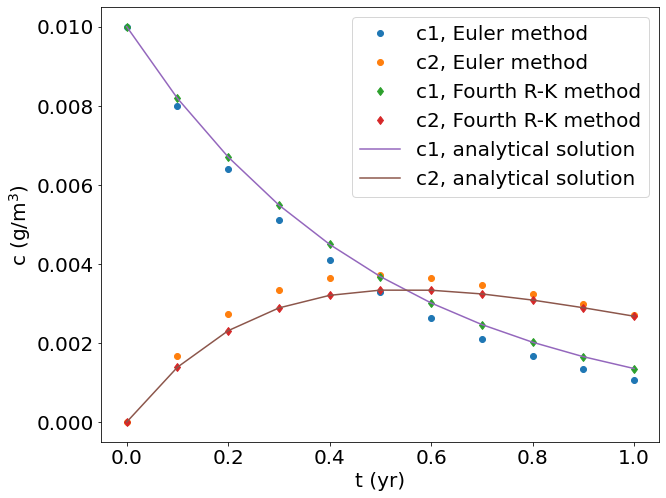

In [33]:
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('legend', fontsize=20) 


plt.figure(figsize=(10,8))
plt.plot(t,c_Euler[0,:],'o',label='c1, Euler method')
plt.plot(t,c_Euler[1,:],'o',label='c2, Euler method')
plt.plot(t,c_RK[0,:],'d',label='c1, Fourth R-K method')
plt.plot(t,c_RK[1,:],'d',label='c2, Fourth R-K method')
plt.plot(t,c1,'-',label = 'c1, analytical solution')
plt.plot(t,c2,'-',label = 'c2, analytical solution')
plt.legend()
plt.xlabel('t (yr)')
plt.ylabel('c (g/m$^3$)')